In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Books\Customer_Transactions.csv", parse_dates = ['order_date'])
print(df.head())

  stomer_id order_date  order_value
0      C001 2024-01-10          500
1      C002 2024-01-15          800
2      C001 2024-02-10          700
3      C003 2024-02-20         1200
4      C002 2024-03-05          900


In [25]:
# Calculate Customer LifeTime Value
clv = df.groupby("stomer_id").agg(
    total_spent = ("order_value", "sum"),
    avg_order_value = ("order_value", "mean"),
    order_count = ("order_value","count")
).reset_index()

In [47]:
# Find Churn Rate using cohort analysis
df['order_month'] = df['order_date'].dt.to_period('M')
cohort = df.groupby(['stomer_id'])['order_month'].min().reset_index()
cohort.columns = ['stomer_id', 'cohort_month']
merged = df.merge(cohort, on ='stomer_id')
churn_rate = merged.groupby('cohort_month')['stomer_id'].nunique().pct_change()
print(merged)
print(churn_rate)

  stomer_id order_date  order_value order_month cohort_month
0      C001 2024-01-10          500     2024-01      2024-01
1      C002 2024-01-15          800     2024-01      2024-01
2      C001 2024-02-10          700     2024-02      2024-01
3      C003 2024-02-20         1200     2024-02      2024-02
4      C002 2024-03-05          900     2024-03      2024-01
5      C001 2024-03-15          400     2024-03      2024-01
6      C004 2024-03-18         1000     2024-03      2024-03
cohort_month
2024-01    NaN
2024-02   -0.5
2024-03    0.0
Freq: M, Name: stomer_id, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_7912\2890992094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clv["stomer_id"], y=clv["total_spent"], palette = "viridis")


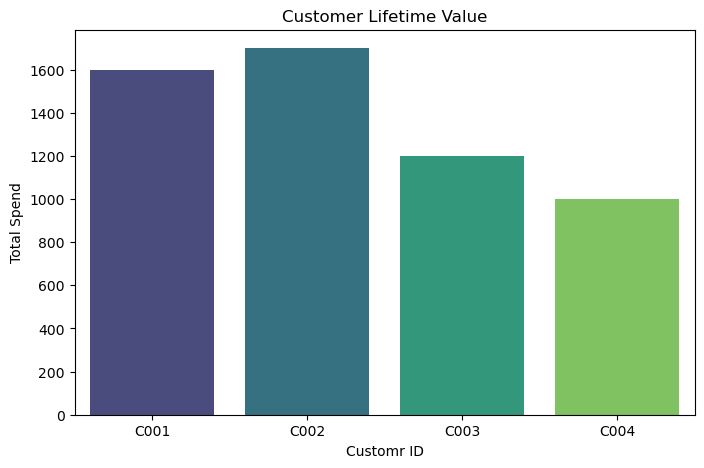

In [45]:
# Visualization
plt.figure(figsize=(8,5))

sns.barplot(x=clv["stomer_id"], y=clv["total_spent"], palette = "viridis")
plt.xlabel("Customr ID")
plt.ylabel("Total Spend")
plt.title("Customer Lifetime Value")
plt.show()